In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# !wget "https://drive.google.com/uc?export=download&id=161SQZ1KFhERZfKuVWzpWKVSWPQcfjjZ1" -O cat-and-dog.zip

--2022-09-01 01:06:48--  https://drive.google.com/uc?export=download&id=161SQZ1KFhERZfKuVWzpWKVSWPQcfjjZ1
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.113, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘cat-and-dog.zip’

cat-and-dog.zip         [ <=>                ]   2.21K  --.-KB/s    in 0s      

2022-09-01 01:06:48 (15.3 MB/s) - ‘cat-and-dog.zip’ saved [2266]



In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!cp /content/drive/MyDrive/cat-and-dog.zip /content/cat-and-dog.zip

In [34]:
import shutil
shutil.unpack_archive('cat-and-dog.zip', 'dataset/')

In [35]:
train_dir = '/content/dataset/training_set/training_set'
valid_dir = '/content/dataset/test_set/test_set'
print(train_dir)
print(valid_dir)

/content/dataset/training_set/training_set
/content/dataset/test_set/test_set


In [16]:
image_gen = ImageDataGenerator(rescale=(1/255.))
image_gen

In [17]:
train_gen = image_gen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    classes=['cats', 'dogs'],
    class_mode='binary',
    seed=0
)
valid_gen = image_gen.flow_from_directory(
    valid_dir,
    batch_size=32,
    target_size=(224, 224),
    classes=['cats', 'dogs'],
    class_mode='binary',
    seed=0
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


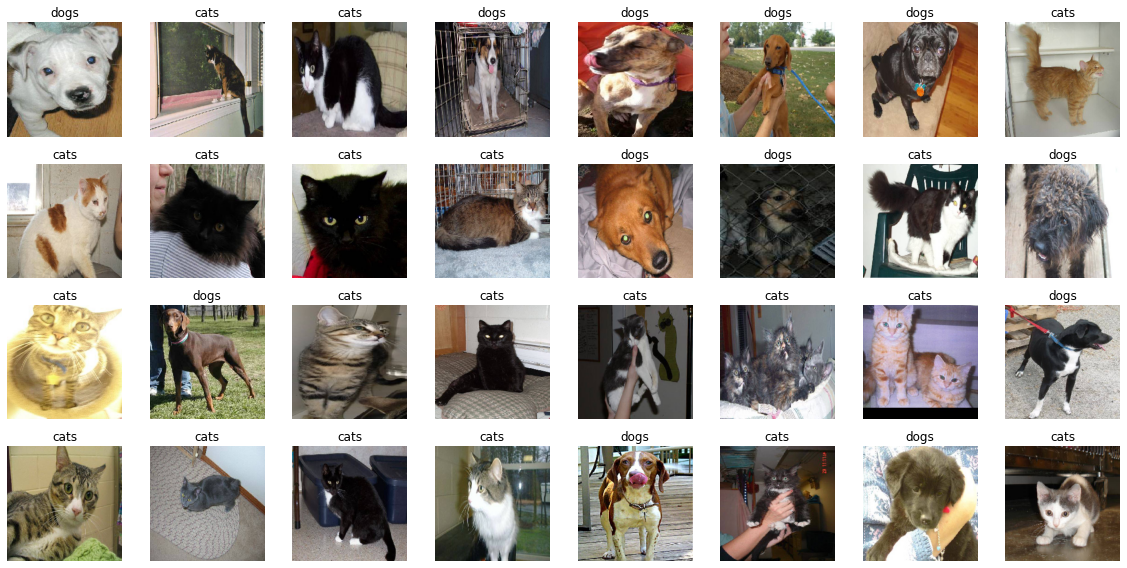

In [18]:
# 샘플 이미지 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1]
plt.figure(figsize=(16, 8))
for i in range(32):
  ax = plt.subplot(4, 8, i+1)
  plt.imshow(images[i])
  plt.title(class_labels[labels[i].astype(np.int)])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
def build_model():
  model=tf.keras.Sequential([
      # Convolution 층
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      # Classifier 출력층
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(1, activation='sigmoid'),
  ])
  return model

In [21]:
model = build_model()

In [22]:
model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
history = model.fit(train_gen, validation_data=valid_gen, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


251/251 [==============================] - 43s 157ms/step - loss: 1.9999 - accuracy: 0.6149 - val_loss: 0.6233 - val_accuracy: 0.6960
Epoch 2/20
251/251 [==============================] - 42s 166ms/step - loss: 0.5730 - accuracy: 0.6933 - val_loss: 0.5496 - val_accuracy: 0.7242
Epoch 3/20
251/251 [==============================] - 38s 151ms/step - loss: 0.5523 - accuracy: 0.7111 - val_loss: 0.5393 - val_accuracy: 0.7271
Epoch 4/20
251/251 [==============================] - 38s 152ms/step - loss: 0.5094 - accuracy: 0.7384 - val_loss: 0.5512 - val_accuracy: 0.7276
Epoch 5/20
251/251 [==============================] - 39s 157ms/step - loss: 0.4973 - accuracy: 0.7543 - val_loss: 0.5429 - val_accuracy: 0.7375
Epoch 6/20
251/251 [==============================] - 38s 152ms/step - loss: 0.4603 - accuracy: 0.7688 - val_loss: 0.5460 - val_accuracy: 0.7514
Epoch 7/20
251/251 [==============================] - 38s 151ms/step - loss: 0.4249 - accuracy: 0.7986 - val_loss: 0.5330 - val_accuracy: 0.7

In [37]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
  fig, axes = plt.subplots(1,2, figsize=(12, 4))

  axes[0].plot(range(1, epoch + 1), loss, label='Training')
  axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch + 1), acc, label='Training')
  axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

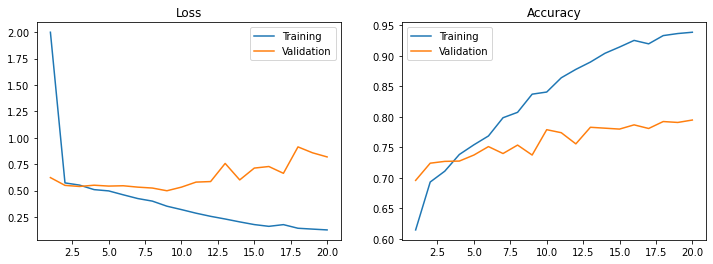

In [25]:
plot_loss_acc(history, 20)

In [38]:
# Data Augmentation (데이터 증강)
image_gen_aug = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   rotation_range=35,
                                   zoom_range=0.2)

In [39]:
train_gen_aug = image_gen_aug.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    classes=['cats', 'dogs'],
    class_mode='binary',
    seed=0
)
valid_gen_aug = image_gen_aug.flow_from_directory(
    valid_dir,
    batch_size=32,
    target_size=(224, 224),
    classes=['cats', 'dogs'],
    class_mode='binary',
    seed=0
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [40]:
model_aug = build_model()
model_aug.compile(optimizer=tf.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_aug = model_aug.fit(train_gen_aug, validation_data=valid_gen_aug, epochs=20)

Epoch 1/20
251/251 [==============================] - 138s 540ms/step - loss: 2.4634 - accuracy: 0.5706 - val_loss: 0.6964 - val_accuracy: 0.5492
Epoch 2/20
251/251 [==============================] - 131s 523ms/step - loss: 0.6400 - accuracy: 0.6265 - val_loss: 0.6324 - val_accuracy: 0.6298
Epoch 3/20
251/251 [==============================] - 131s 523ms/step - loss: 0.6194 - accuracy: 0.6513 - val_loss: 0.5836 - val_accuracy: 0.6906
Epoch 4/20
251/251 [==============================] - 131s 523ms/step - loss: 0.6048 - accuracy: 0.6653 - val_loss: 0.5598 - val_accuracy: 0.7093
Epoch 5/20
251/251 [==============================] - 132s 526ms/step - loss: 0.5860 - accuracy: 0.6857 - val_loss: 0.5538 - val_accuracy: 0.7059
Epoch 6/20
251/251 [==============================] - 131s 524ms/step - loss: 0.5693 - accuracy: 0.6996 - val_loss: 0.6032 - val_accuracy: 0.6614
Epoch 7/20
251/251 [==============================] - 131s 523ms/step - loss: 0.5625 - accuracy: 0.7058 - val_loss: 0.5642 -

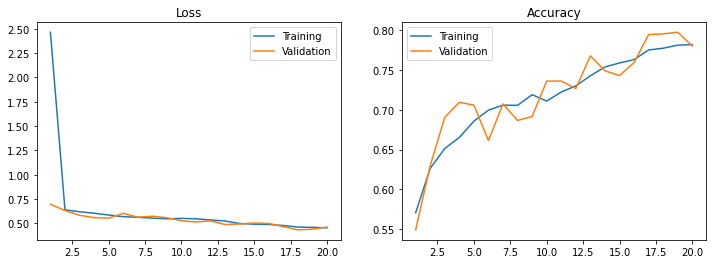

In [41]:
plot_loss_acc(history_aug, 20)